# FIT5202 Assignment 1 : Analysing eCommerce Data

## Table of Contents
*
    * [Part 1 : Working with RDD](#part-1)
        * [1.1 Data Preparation and Loading](#1.1)
        * [1.2 Data Partitioning in RDD](#1.2)
        * [1.3 Query/Analysis](#1.3)
    * [Part 2 : Working with DataFrames](#2-dataframes)
        * [2.1 Data Preparation and Loading](#2-dataframes)
        * [2.2 Query/Analysis](#2.2)
    * [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)

# Part 1 : Working with RDDs <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for retail analysis.

### 1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine.

In [125]:
pip install pyspark

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession


master = "local[*]"
app_name = "Assignment 1"

spark_conf = SparkConf() \
    .setAppName(app_name).setMaster(master)
spark = SparkSession.builder \
    .config(conf=spark_conf) \
    .getOrCreate()

spark.conf.set("spark.sql.session.timeZone", "Australia/Melbourne")

sc = spark.sparkContext
sc.setLogLevel('ERROR')

In [128]:
catt = '/content/drive/MyDrive/category.csv'
prod = '/content/drive/MyDrive/product.csv'
sales = '/content/drive/MyDrive/sales.csv'
user = '/content/drive/MyDrive/users.csv'

1.1.2 Load CUPS csv files into four RDDs.

In [221]:
rdd1 = sc.textFile(user)
rdd2 = sc.textFile(sales)
rdd3 = sc.textFile(catt)
rdd4 = sc.textFile(prod)

print("RDD 1:")
print(rdd1.take(5))

print("RDD 2:")
print(rdd2.take(5))

print("RDD 3:")
print(rdd3.take(5))

print("RDD 4:")
print(rdd4.take(5))

RDD 1:
['user_id,firstname,lastname,dob,address,postcode,state,sex,suburb', '514771925,MERVYN,Unknown,1-5-1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL', '531947692,FALLON,Unknown,16-10-2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE', '560231306,KALIN,Unknown,19-8-2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN', '575248835,PIETTA,Unknown,19-1-1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON']
RDD 2:
['id,sales_timestamp,product_id,price,user_id,user_session', '338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357,0ad58441-9db9-48bd-9ee7-accf603f06e0', '338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649,2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc', '338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510,43609582-1818-4885-bd72-3791f3a4ec93', '338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483,bbf972ef-8f8d-4a33-bcbd-ac09af67ea40']
RDD 3:
['category_id,category_code', '2090971686529663114,appliances.environment.vacuum', '2232732

1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [222]:
def remove_header(index, iterator):
    if index == 0:
        next(iterator)  # Skip the header row
    return iterator


rdd11 = rdd1.mapPartitions(lambda x: csv.reader(x))
# Apply the remove_header function to each RDD
rdd1_no_header = rdd1.mapPartitionsWithIndex(remove_header)
rdd2_no_header = rdd2.mapPartitionsWithIndex(remove_header)
rdd3_no_header = rdd3.mapPartitionsWithIndex(remove_header)
rdd4_no_header = rdd4.mapPartitionsWithIndex(remove_header)
print("RDD 1:")
print("Total Count:", rdd1_no_header.count())
print("First 10 Records:", rdd1_no_header.take(10))

RDD 1:
Total Count: 15639803
First 10 Records: ['514771925,MERVYN,Unknown,1-5-1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL', '531947692,FALLON,Unknown,16-10-2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE', '560231306,KALIN,Unknown,19-8-2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN', '575248835,PIETTA,Unknown,19-1-1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON', '575243330,SUMMAH,Unknown,19-4-1973,44 CLARENDON ROAD,2048,NSW,female,STANMORE', '516606243,KEIRA,Unknown,9-6-2011,1 VIOLA CLOSE,4868,QLD,female,BAYVIEW HEIGHTS', '545807768,VERITY,Unknown,1-2-1980,31-33 KING STREET,3550,VIC,female,BENDIGO', '529118965,MAXWELL,Unknown,16-5-2012,15 HARWELL WAY,6721,WA,male,WEDGEFIELD', '518625399,NATASHIA,Unknown,5-6-1973,"UNIT 3, 17 BOX STREET",6530,WA,female,WEBBERTON', '518273873,JUSTINE,Unknown,27-8-2007,"UNIT 909, 112 GODERICH STREET",6004,WA,male,EAST PERTH']


In [223]:
print("RDD 2:")
print("Total Count:", rdd2_no_header.count())
print("First 10 Records:", rdd2_no_header.take(10))

RDD 2:
Total Count: 6848824
First 10 Records: ['338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357,0ad58441-9db9-48bd-9ee7-accf603f06e0', '338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649,2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc', '338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510,43609582-1818-4885-bd72-3791f3a4ec93', '338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483,bbf972ef-8f8d-4a33-bcbd-ac09af67ea40', '338156953,2020-03-27 02:04:18.000000 +00:00,1005212,174.25,633245502,90166e0d-d7da-4997-b479-bc3a0fd724d6', '338156985,2020-03-27 02:04:24.000000 +00:00,100132156,47.5,541680528,4cd111cc-8716-4720-b7e3-bc3c8ddce98f', '338157055,2020-03-27 02:04:37.000000 +00:00,3500009,290.84,618162129,d0bda424-a759-4941-b9be-5091c28009db', '338157122,2020-03-27 02:04:48.000000 +00:00,2300214,386.08,626601722,ce913646-936a-4b2e-b6bb-9f6e0d781bc5', '338157141,2020-03-27 02:04:52.000000 +00:00,100070443,35.01,604369152,fd55e2cd-d

In [225]:
print("RDD 3:")
print("Total Count:", rdd3_no_header.count())
print("First 10 Records:", rdd3_no_header.take(10))

RDD 3:
Total Count: 1464
First 10 Records: ['2090971686529663114,appliances.environment.vacuum', '2232732116498514828,apparel.jeans', '2232732109628244704,apparel.shirt', '2232732103294845523,apparel.shoes.step_ins', '2232732086500851925,apparel.scarf', '2232732100660822557,country_yard.cultivator', '2053013558282682943,construction.tools.drill', '2053013562527318829,furniture.living_room.cabinet', '2110937143172923797,construction.tools.light', '2074462942123786261,kids.toys']


In [226]:
print("RDD 4:")
print("Total Count:", rdd4_no_header.count())
print("First 10 Records:", rdd4_no_header.take(10))

RDD 4:
Total Count: 208290
First 10 Records: ['100168127,2053013554096767303,,30.8171196068388', '7101887,2232732103764607583,,33.6457534471799', '100058603,2053013555438944659,,32.1982006550096', '100007811,2232732112782361392,etro,300.111251624047', '26400508,2053013553056579841,,139.458912588293', '100215722,2134905019189691101,,4.15035271832127', '32402016,2232732115777094520,,5.90104832419485', '13201248,2232732061804790604,brw,400.468187201711', '2701879,2053013563911439225,beko,249.969115457257', '15300266,2232732107698864813,,2.85509519214549']


1.1.4 Drop unnecessary columns from RDDs: firstname, lastname, user_session.

In [227]:
rdd1_new = rdd1_no_header.map(lambda x: x.split(","))
rdd2_new = rdd2_no_header.map(lambda x: x.split(","))

In [335]:
def make_ness_col(x):
  fields = x
  field = [fields[0],fields[3],fields[4],fields[5],fields[6],fields[7],fields[8]]
  return field
rdd1_filtered = rdd1_new.map(make_ness_col)

def make_ness_col2(x1):
  fields = x1
  field = [fields[0],fields[1],fields[2],fields[3],fields[4]]
  return field
rdd2_filtered = rdd2_new.map(make_ness_col2)




### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition. Answer the following questions: How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it will be partitioned in this number? If I only have one single core CPU in my PC, what is the default partition's number? (Hint: search the Spark source code to try to answer this question.) Write code and your explanation in Markdown cells.

In [229]:
def print_partition_info(ind, it):
    count = 0
    for _ in it:
        count += 1
    yield ind, count

partition_info = rdd1_filtered.mapPartitionsWithIndex(print_partition_info).collect()

In [233]:
print("Number of partitions in rdd1:")
rdd1_filtered.getNumPartitions()

Number of partitions in rdd1:


39

In [234]:
print("Number of partitions in rdd2:")
rdd2_filtered.getNumPartitions()

Number of partitions in rdd2:


22

In [235]:
print("Number of partitions in rdd3:")
rdd3_no_header.getNumPartitions()

Number of partitions in rdd3:


2

In [236]:
print("Number of partitions in rdd4:")
rdd4_no_header.getNumPartitions()

Number of partitions in rdd4:


2

 How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy?
 By default when data is loaded into the RDDs it uses default partitioning strategy based on the number of available cores in the cluster. If do not specify a partitioning count then spark tries to infer the number of partitions based on the clusters resources.

 Can you explain why it will be partitioned in this number?
 The default partitioning strategy aims to achieve a balance between parallelism and resource utilization. Spark tries to assign a reasonable number of partitions to fully utlilize the available cores while also avoiding excessive overhead due to having too many tiny partitions.


 If I only have one single core CPU in my PC, what is the default partition's number?
 In this case spark will usually create only one partition. However it might also sometimes try create mltiple partitions even for a single core setp to ensure that the tasks are distributed and executed efficiently. This happens due to the way spark's partitioning is designed.

In [241]:
def print_partition_info(ind, it):
    c = 0
    for _ in it:
        c += 1
    yield ind, c

def print_partition_stats(rdd, name):
    partition_info = rdd.mapPartitionsWithIndex(print_partition_info).collect()
    print(f"{name} Partitions:", len(partition_info))
    for partition, count in partition_info:
        print(f"Partition {partition}: {count} records")

print_partition_stats(rdd1_filtered, "RDD 1")
print_partition_stats(rdd2_filtered, "RDD 2")
print_partition_stats(rdd3_no_header, "RDD 3")
print_partition_stats(rdd4_no_header, "RDD 4")

RDD 1 Partitions: 39
Partition 0: 407684 records
Partition 1: 407751 records
Partition 2: 407663 records
Partition 3: 407640 records
Partition 4: 407740 records
Partition 5: 407698 records
Partition 6: 407764 records
Partition 7: 407723 records
Partition 8: 407732 records
Partition 9: 407782 records
Partition 10: 407851 records
Partition 11: 407787 records
Partition 12: 407659 records
Partition 13: 407782 records
Partition 14: 407827 records
Partition 15: 407766 records
Partition 16: 407888 records
Partition 17: 407701 records
Partition 18: 407788 records
Partition 19: 407748 records
Partition 20: 407745 records
Partition 21: 407862 records
Partition 22: 407724 records
Partition 23: 407781 records
Partition 24: 407785 records
Partition 25: 407745 records
Partition 26: 407680 records
Partition 27: 407655 records
Partition 28: 407691 records
Partition 29: 407780 records
Partition 30: 407737 records
Partition 31: 407740 records
Partition 32: 407693 records
Partition 33: 407728 records
Par

1.2.2. Create a user defined function (UDF) to transform category_code to capitalized words. (e.g. apparel.shoes.ballet_shoes shall be converted to “Apparel Shots Ballet_shoes).

In [242]:
rdd3_no_header.take(5)

['2090971686529663114,appliances.environment.vacuum',
 '2232732116498514828,apparel.jeans',
 '2232732109628244704,apparel.shirt',
 '2232732103294845523,apparel.shoes.step_ins',
 '2232732086500851925,apparel.scarf']

In [336]:
def transform_category_code(x):
    x1 = x.split(",")
    words = x1[1].split('.')
    capitalized_words = [word.capitalize() for word in words]
    ww = [x1[0],'.'.join(capitalized_words)]
    return ",".join(ww)

In [337]:

rdd3_filter = rdd3_no_header.map(transform_category_code)
rdd3_filter.take(5)


['2090971686529663114,Appliances.Environment.Vacuum',
 '2232732116498514828,Apparel.Jeans',
 '2232732109628244704,Apparel.Shirt',
 '2232732103294845523,Apparel.Shoes.Step_ins',
 '2232732086500851925,Apparel.Scarf']

1.2.3. Join Product and Category RDDs and Create a new key value RDD, using brand as the key and all of the categories of that brand as the value. Print out the first 5 records of the key-value RDD.

In [245]:
product_key_value_rdd = rdd4_no_header.map(lambda w: (w.split(",")[1], w.split(",")[2]))
category_key_value_rdd = rdd3_no_header.map(lambda w: (w.split(",")[0], w))

In [246]:
product_key_value_rdd.take(5) #

[('2053013554096767303', ''),
 ('2232732103764607583', ''),
 ('2053013555438944659', ''),
 ('2232732112782361392', 'etro'),
 ('2053013553056579841', '')]

In [247]:
cat = product_key_value_rdd.join(category_key_value_rdd)

In [248]:
cat = cat.map(lambda n: n[1])  #mapin the function

In [250]:
cat = cat.distinct().groupBy(lambda x: x[0]) # using distinct and group by

In [251]:
cat.take(5)

[('askona', <pyspark.resultiterable.ResultIterable at 0x7ea3ae310070>),
 ('aquarodos', <pyspark.resultiterable.ResultIterable at 0x7ea3ae3109a0>),
 ('borovici', <pyspark.resultiterable.ResultIterable at 0x7ea3ae3113c0>),
 ('mebelev', <pyspark.resultiterable.ResultIterable at 0x7ea3ae311e70>),
 ('stendmebel', <pyspark.resultiterable.ResultIterable at 0x7ea3ae3112a0>)]

In [252]:
cat1 = cat.mapValues(lambda x: [x1[1:] for x1 in x])  #mapin the function

In [253]:
cat1.take(5)

[('askona',
  [('2232732061804790604,furniture.bedroom.bed',),
   ('2053013561185141473,accessories.umbrella',),
   ('2053013561780732677,furniture.bedroom.pillow',),
   ('2053013557166998015,others',),
   ('2232732089042600205,furniture.bedroom.bed',),
   ('2053013561185141473,others',),
   ('2232732092951691632,others',),
   ('2053013561696846593,construction.tools.welding',),
   ('2053013561696846593,others',),
   ('2053013553375346967,computers.notebook',),
   ('2232732085729099973,computers.desktop',),
   ('2232732094025433482,furniture.bedroom.blanket',),
   ('2232732090980368698,furniture.living_room.sofa',),
   ('2053013553375346967,others',),
   ('2232732090770653494,others',),
   ('2232732090409943342,furniture.bedroom.pillow',),
   ('2053013561847841545,furniture.bedroom.blanket',),
   ('2232732089302647060,furniture.bedroom.blanket',)]),
 ('aquarodos',
  [('2232732061804790604,furniture.bedroom.bed',),
   ('2232732081702568046,furniture.bathroom.toilet',),
   ('223273207671

In [254]:
cat1.sortByKey().take(5) # sorting using key

[('a-case',
  [('2053013558525952589,electronics.smartphone',),
   ('2232732099436085763,construction.tools.welding',),
   ('2053013558525952589,others',)]),
 ('a-derma',
  [('2232732085594882243,others',),
   ('2053013558895051365,others',),
   ('2053013557477376525,furniture.bathroom.bath',),
   ('2053013558861496931,apparel.shoes',),
   ('2232732085393555647,furniture.living_room.sofa',),
   ('2053013552737812719,stationery.cartrige',),
   ('2053013561159975647,others',),
   ('2053013558895051365,apparel.shoes',),
   ('2053013558861496931,others',)]),
 ('a-elita',
  [('2055156924407612189,accessories.bag',),
   ('2053013560623104713,auto.accessories.parktronic',)]),
 ('a-mega',
  [('2053013557192163841,furniture.bedroom.bed',),
   ('2053013553484398879,appliances.kitchen.toster',),
   ('2053013553484398879,others',)]),
 ('a-product', [('2139960757993866211,others',)])]

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

**1.3.1 Calculate the average daily sales for each year, each month. Print the results as the following format(see assignment specification).**

In [338]:
rdd2_filtered.take(5)

[['338156802',
  '2020-03-27 02:03:48.000000 +00:00',
  '4804056',
  '171.56',
  '513119357'],
 ['338156808',
  '2020-03-27 02:03:49.000000 +00:00',
  '1005223',
  '209.53',
  '522277649'],
 ['338156913',
  '2020-03-27 02:04:11.000000 +00:00',
  '1005212',
  '174.25',
  '632847510'],
 ['338156921',
  '2020-03-27 02:04:13.000000 +00:00',
  '1005236',
  '231.15',
  '626579483'],
 ['338156953',
  '2020-03-27 02:04:18.000000 +00:00',
  '1005212',
  '174.25',
  '633245502']]

In [369]:
s = rdd2_filtered.map(lambda x: [(x[1].split("-")[0],x[1].split("-")[1]) ,x[3]])  #mapin the function

In [366]:
s1 = s.groupBy(lambda t: t[0]).mapValues(lambda t1: (sum(float(u[1]) for u in t1) / 30)) #using groupby and maping the function

In [367]:
s1.take(5)

[(('2020', '03'), 10712613.610657271),
 (('2019', '10'), 7665250.075667426),
 (('2019', '12'), 11472560.971322643),
 (('2020', '02'), 12705964.51399218),
 (('2020', '04'), 8150859.736995624)]

**1.3.2 Find 10 of the best selling brands. You should display the brand and total revenue in the result.**

In [355]:
w1 = rdd2_filtered.map(lambda y: [y[2],y[3]])  #maping the function

In [356]:
w2 = rdd4_no_header.map(lambda y1: [y1.split(",")[0],y1.split(",")[2]])  #maping the function

In [358]:
w2.take(5)

[['100007811', 'etro'],
 ['13201248', 'brw'],
 ['2701879', 'beko'],
 ['11800014', 'sony'],
 ['100093322', 'cd']]

In [359]:
w3 = w2.join(w1) #performing join


In [360]:
w3 = w3.map(lambda b: b[1])

In [361]:
w3 = w3.groupBy(lambda i: i[0]).mapValues(lambda i1: (sum(float(i2[1]) for i2 in i1))) #maping the function

In [364]:
w3.take(5)

[('alcon', 4419.589999999998),
 ('nike', 654194.3899999969),
 ('midea', 7306327.50000032),
 ('genius', 24857.419999999867),
 ('medi-peel', 3431.4000000000005)]

## Part 2. Working with DataFrames <a class="anchor" name="2-dataframes"></a>
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

**2.1.1. Load CUPS into four separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each columns (Note: Initially, you should read date/time related column as the string type).**

In [129]:
from pyspark.sql.types import StructType,StructField,StringType,DoubleType

usr = StructType([ \
    StructField("user_id",StringType(),True), \
    StructField("firstname",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("dob",StringType(),True), \
    StructField("address",StringType(),True), \
    StructField("postcode",IntegerType(),True), \
    StructField("state",StringType(),True), \
    StructField("sex",StringType(),True), \
    StructField("suburb",StringType(),True), \
])

cate = StructType([ \
    StructField("category_id",StringType(),True), \
    StructField("category_code",StringType(),True), \
])

produc = StructType([ \
    StructField("product_id",StringType(),True), \
    StructField("category_id",StringType(),True), \
    StructField("brand",StringType(),True), \
    StructField("avg_cost",DoubleType(),True), \
])

sal = StructType([ \
    StructField("id",StringType(),True), \
    StructField("sales_timestamp",StringType(),True), \
    StructField("product_id",StringType(),True), \
    StructField("price",DoubleType(),True), \
    StructField("user_id",StringType(),True), \
    StructField("user_session",StringType(),True), \
])

In [130]:
df_cat = spark.read.csv(catt,schema=cate,header=True)
df_user = spark.read.csv(user,schema=usr,header=True)
df_prod = spark.read.csv(prod,schema=produc,header=True)
df_sale = spark.read.csv(sales,schema=sal,header=True)

**2.1.2 Display the schema of the four dataframes.**

In [368]:
df_cat.printSchema()
df_user.printSchema()
df_prod.printSchema()
df_sale.printSchema()

root
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)

root
 |-- user_id: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)

root
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: double (nullable = true)

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)



### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

**2.2.1. Transform the 'sales_time' column in the sales dataframe to the date type; extract the hour in sales_date and create a new column “sales_hour”; after that, show the schema.**

In [131]:
import pyspark.sql.functions as F

hour = F.udf(lambda x: x.split(' ')[1][0:2])
df_sale1 = df_sale.withColumn("sales_hour", hour("sales_timestamp"))
df_sale1 = df_sale1.withColumn('sales_time', F.col('sales_timestamp').cast('date'))
df_sale1 = df_sale1.drop('sales_timestamp')

In [ ]:
df_sale1.show(10)

+---------+----------+-----+---------+--------------------+----------+----------+
|       id|product_id|price|  user_id|        user_session|sales_hour|sales_time|
+---------+----------+-----+---------+--------------------+----------+----------+
|338156802|   4804056| null|513119357|0ad58441-9db9-48b...|        02|2020-03-27|
|338156808|   1005223| null|522277649|2ecb2725-2c40-4ac...|        02|2020-03-27|
|338156913|   1005212| null|632847510|43609582-1818-488...|        02|2020-03-27|
|338156921|   1005236| null|626579483|bbf972ef-8f8d-4a3...|        02|2020-03-27|
|338156953|   1005212| null|633245502|90166e0d-d7da-499...|        02|2020-03-27|
|338156985| 100132156| null|541680528|4cd111cc-8716-472...|        02|2020-03-27|
|338157055|   3500009| null|618162129|d0bda424-a759-494...|        02|2020-03-27|
|338157122|   2300214| null|626601722|ce913646-936a-4b2...|        02|2020-03-27|
|338157141| 100070443| null|604369152|fd55e2cd-dc42-4bf...|        02|2020-03-27|
|338157271|   13

**2.2.2. Calculate total sales for each hour, sort your result based on each hour’s sales in a descending order. Print out the sales_hour and total_sales columns.**

In [ ]:
df_sale2 = df_sale1.groupBy('sales_hour').agg(F.sum('price').alias('total_sales')).sort(F.desc('total_sales')).show(30)

+----------+-----------+
|sales_hour|total_sales|
+----------+-----------+
|        09|    1584100|
|        08|    1534538|
|        10|    1420118|
|        07|    1368512|
|        11|    1259870|
|        06|    1221002|
|        12|    1202359|
|        14|    1117996|
|        05|    1117822|
|        13|    1109995|
|        15|     998599|
|        17|     876240|
|        04|     861360|
|        16|     850436|
|        18|     783452|
|        03|     556797|
|        19|     518160|
|        20|     345030|
|        02|     257545|
|        21|     195973|
|        22|     133932|
|        01|      99520|
|        23|      86317|
|        00|      60683|
+----------+-----------+



**2.2.3.Find 10 most profitable categories (profit can be simply defined as price - avg_cost). Print out the category name and total profit. Please print the category name in capitalized word format(hint: you can reuse the UDF defined in part 1.)**

In [7]:
df_cat.show(10)

+-------------------+--------------------+
|        category_id|       category_code|
+-------------------+--------------------+
|2090971686529663114|appliances.enviro...|
|2232732116498514828|       apparel.jeans|
|2232732109628244704|       apparel.shirt|
|2232732103294845523|apparel.shoes.ste...|
|2232732086500851925|       apparel.scarf|
|2232732100660822557|country_yard.cult...|
|2053013558282682943|construction.tool...|
|2053013562527318829|furniture.living_...|
|2110937143172923797|construction.tool...|
|2074462942123786261|           kids.toys|
+-------------------+--------------------+
only showing top 10 rows



In [8]:
df_sale.show(10)

+---------+--------------------+----------+-----+---------+--------------------+
|       id|     sales_timestamp|product_id|price|  user_id|        user_session|
+---------+--------------------+----------+-----+---------+--------------------+
|338156802|2020-03-27 02:03:...|   4804056| null|513119357|0ad58441-9db9-48b...|
|338156808|2020-03-27 02:03:...|   1005223| null|522277649|2ecb2725-2c40-4ac...|
|338156913|2020-03-27 02:04:...|   1005212| null|632847510|43609582-1818-488...|
|338156921|2020-03-27 02:04:...|   1005236| null|626579483|bbf972ef-8f8d-4a3...|
|338156953|2020-03-27 02:04:...|   1005212| null|633245502|90166e0d-d7da-499...|
|338156985|2020-03-27 02:04:...| 100132156| null|541680528|4cd111cc-8716-472...|
|338157055|2020-03-27 02:04:...|   3500009| null|618162129|d0bda424-a759-494...|
|338157122|2020-03-27 02:04:...|   2300214| null|626601722|ce913646-936a-4b2...|
|338157141|2020-03-27 02:04:...| 100070443| null|604369152|fd55e2cd-dc42-4bf...|
|338157271|2020-03-27 02:05:

In [9]:
df_prod.show(10)

+----------+-------------------+-----+--------+
|product_id|        category_id|brand|avg_cost|
+----------+-------------------+-----+--------+
| 100168127|2053013554096767303| null|    null|
|   7101887|2232732103764607583| null|    null|
| 100058603|2053013555438944659| null|    null|
| 100007811|2232732112782361392| etro|    null|
|  26400508|2053013553056579841| null|    null|
| 100215722|2134905019189691101| null|    null|
|  32402016|2232732115777094520| null|    null|
|  13201248|2232732061804790604|  brw|    null|
|   2701879|2053013563911439225| beko|    null|
|  15300266|2232732107698864813| null|    null|
+----------+-------------------+-----+--------+
only showing top 10 rows



In [62]:
from pyspark.sql.functions import broadcast
df_joined_broadcast = df_cat.join(broadcast(df_prod),df_prod.category_id==df_cat.category_id,how='inner')
df_joined_broadcast2 = df_sale.join(df_joined_broadcast,df_joined_broadcast.product_id==df_sale.product_id,how='inner')

In [84]:
df_joined_broadcast = df_joined_broadcast2.withColumn("Pr",df_joined_broadcast2['price'] - df_joined_broadcast2['avg_cost'])

In [80]:
df_joined_broadcast.show()

+---------+--------------------+----------+-----+---------+--------------------+-------------------+-------------+----------+-------------------+-------+----------------+-------------------+
|       id|     sales_timestamp|product_id|price|  user_id|        user_session|        category_id|category_code|product_id|        category_id|  brand|        avg_cost|                 Pr|
+---------+--------------------+----------+-----+---------+--------------------+-------------------+-------------+----------+-------------------+-------+----------------+-------------------+
|141808234|2019-12-17 14:52:...| 100000023|54.03|512644847|1c8e1f85-e703-415...|2053013561277416167|       others| 100000023|2053013561277416167| bigben|48.6198535618814|  5.410146438118602|
|351007969|2020-04-04 15:28:...| 100000024|72.05|636643673|2164816e-c937-43a...|2232732105123562109|apparel.scarf| 100000024|2232732105123562109|ubisoft|57.0421641259153| 15.007835874084698|
|351007969|2020-04-04 15:28:...| 100000024|72

In [75]:
df_joined_broadcast4 = df_joined_broadcast.groupBy('category_code').agg(F.sum('pr').alias('total_profit'))

In [69]:
def transform_category_code(x):
    words = x.split('.')
    capitalized_words = [word.capitalize() for word in words]
    #ww = [' '.join(capitalized_words)]
    return ' '.join(capitalized_words)

In [70]:
from pyspark.sql.functions import col, udf
convertUDF = udf(lambda z: transform_category_code(z),StringType())
#df_joined_broadcast3 = df_joined_broadcast.withColumn("category Name", transform_category_code('category_code'))
df_joined_broadcast4.select(convertUDF(col("category_code")).alias("category Name"),col('total_profit')).sort(F.desc('total_profit')).show(10)

+--------------------+--------------------+
|       category Name|        total_profit|
+--------------------+--------------------+
|Construction Tool...| 5.812833389237851E7|
|              Others|1.4376613943366347E7|
|Appliances Kitche...|    6037513.86898409|
|Appliances Person...|   5451166.058430032|
|  Computers Notebook|  3514810.3210696056|
|Electronics Audio...|   3228578.099845702|
|Appliances Kitche...|   2998500.589252331|
|Appliances Enviro...|   2135828.001764414|
| Stationery Cartrige|  1931292.7781732907|
|  Electronics Clocks|  1662857.1804789265|
+--------------------+--------------------+
only showing top 10 rows



In [66]:
df_joined_broadcast.filter(df_joined_broadcast.total_profit.isNotNull()).show()

+--------------------+------------------+
|       category_code|      total_profit|
+--------------------+------------------+
|    computers.ebooks| 31538.65947660072|
|apparel.shoes.sli...| 595940.0116838096|
|computers.periphe...| 4334.102696330604|
|construction.tool...|178264.19171902147|
|appliances.kitche...| 1133316.837039947|
|electronics.video...| 150068.0448190215|
|     sport.snowboard|19835.867813879417|
|       apparel.shirt|129745.28316537777|
|electronics.camer...|103653.36832882102|
|electronics.audio...| 3228578.099845702|
|appliances.kitche...|283440.16398370196|
|appliances.kitche...| 66809.77831862957|
|  electronics.tablet| 773962.8678973827|
|appliances.kitche...| 105433.9021604841|
|auto.accessories....| 40335.35986982113|
|apparel.shoes.moc...| 564148.9953528396|
|       apparel.jeans|-75744.25791193443|
|computers.periphe...| 96461.15720718351|
| stationery.cartrige|1931292.7781732907|
|furniture.living_...| 207700.8608442781|
+--------------------+------------

**2.2.4. Use DataFrame filters to find all transactions sold at loss (defined as price < avg_cost), calculate 10 worst loss margin in percentage. (margin is defined as (price - avg_cost)/avg_cost; if price - avg_cost > 0, it’s call a profit margin; otherwise a loss margin)**

In [89]:
df_loss = df_joined_broadcast.filter(df_joined_broadcast['pr'] < 0)
df_loss.withColumn("loss margin",(df_joined_broadcast['pr'] / df_joined_broadcast['avg_cost'])*100).sort('margin').show(10)

+---------+--------------------+----------+-----+---------+--------------------+-------------------+--------------------+----------+-------------------+------+----------------+------------------+------------------+
|       id|     sales_timestamp|product_id|price|  user_id|        user_session|        category_id|       category_code|product_id|        category_id| brand|        avg_cost|                Pr|            margin|
+---------+--------------------+----------+-----+---------+--------------------+-------------------+--------------------+----------+-------------------+------+----------------+------------------+------------------+
|204017856|2020-01-16 08:07:...|   2602040| 4.61|564337537|78faeadd-873e-473...|2053013563970159485|appliances.kitche...|   2602040|2053013563970159485| bosch|608.708523068662| -604.098523068662|-99.24265887115236|
|204017856|2020-01-16 08:07:...|   2602040| 4.61|564337537|78faeadd-873e-473...|2053013563970159485|              others|   2602040|20530135

**2.2.5. Draw a barchart to show total sales from different states in each year.**

In [103]:
df_state = df_sale1.join(df_user,df_user.user_id==df_sale1.user_id,how='inner')

In [93]:
df_state.show(5)

+---------+----------+------+---------+--------------------+----------+----------+---------+---------+--------+----------+----------------+--------+-----+------+-------+
|       id|product_id| price|  user_id|        user_session|sales_hour|sales_time|  user_id|firstname|lastname|       dob|         address|postcode|state|   sex| suburb|
+---------+----------+------+---------+--------------------+----------+----------+---------+---------+--------+----------+----------------+--------+-----+------+-------+
|356442081|  12703931|194.08|128029678|6149bcd2-37df-40e...|        06|2020-04-08|128029678|    SERGE| Unknown|23-10-1960|  13 TRADE PLACE|    3133|  VIC|  male|VERMONT|
|356456957|  12703931|194.08|128029678|6149bcd2-37df-40e...|        07|2020-04-08|128029678|    SERGE| Unknown|23-10-1960|  13 TRADE PLACE|    3133|  VIC|  male|VERMONT|
|321329055|  12703931|181.73|128029678|a5b8a7bc-1641-4f4...|        18|2020-03-20|128029678|    SERGE| Unknown|23-10-1960|  13 TRADE PLACE|    3133|  

In [104]:
df_state = df_state.withColumn('sales_year',F.year(col('sales_time')))

In [115]:
df_state.show(5)

+-----+----------+--------------------+
|state|sales_year|         total_price|
+-----+----------+--------------------+
|  ACT|      2020| 1.969928253000002E7|
|  VIC|      2019|2.2068959634000325E8|
|   SA|      2020| 9.000863934000091E7|
|  QLD|      2020|2.5114637523001552E8|
|  QLD|      2019|1.7657346307001534E8|
+-----+----------+--------------------+
only showing top 5 rows



In [105]:
df_state = df_state.groupBy(['state','sales_year']).agg(F.sum('price').alias('total_price'))

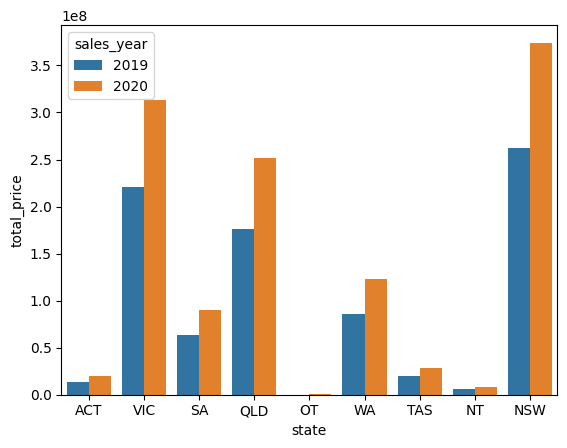

In [184]:
import seaborn as sns
dfpd_state = df_state.toPandas()
fig, ax = plt.subplots()

sns.barplot(ax = ax, data = dfpd_state, x = 'state', y = 'total_price', hue = 'sales_year')

plt.show()

**2.2.6. Draw a scatter plot of customer age and their total spending with MOTH. To limit the number of datapoints, you may show the top 1000 “most valuable” customers only. You may also use log scale for the XY axis.**

In [176]:
age = df_sale.join(df_user,"user_id",how='inner')

In [168]:
def agee(x):
  x1 = x.split("-")
  if len(x1[0]) == 1:
    x2 = '0' + x1[0]
  else:
    x2 = x1[0]
  if len(x1[1]) == 1:
    x3 = '0' + x1[1]
  else:
    x3 = x1[1]
  x4 = x1[2] + '-' + x3 + '-' + x2
  return x4

In [177]:
from pyspark.sql.functions import col, udf
ageUDF = udf(lambda z: agee(z),StringType())
age = age.withColumn('dobbb',ageUDF(col("dob")))

In [178]:
age = age.withColumn('sales_time', F.col('sales_timestamp').cast('date'))
age = age.withColumn('dobb', F.col('dobbb').cast('date'))

In [179]:
age = age.withColumn("age", F.floor(F.datediff(F.col("sales_time"),F.col("dobb"))/365.25))

In [189]:
age_group = age.groupBy('user_id').agg(F.max('age').alias('customer_age'),F.sum('price').alias('Total amount')).sort(F.desc('Total amount'))

In [190]:
age_group = age_group.limit(1000)
age_grouppd = age_group.toPandas()

<Axes: xlabel='Total amount', ylabel='customer_age'>

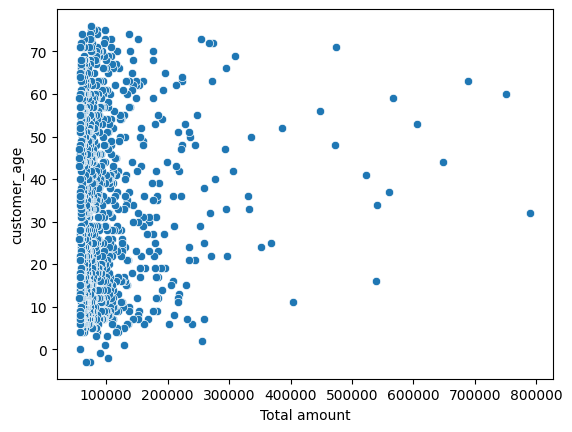

In [191]:
sns.scatterplot(x="Total amount", y="customer_age",data=age_grouppd)

In [182]:
age_group.show()

+---------+------------------+------------------+
|  user_id|             c_age|      Total amount|
+---------+------------------+------------------+
|553431815|              32.0| 790120.9399999969|
|549109608|59.862617498192336| 750149.9700000036|
|569333570|              63.0| 689273.0899999995|
|513230794| 43.45010924981792| 647798.6499999984|
|595104624|              53.0| 605792.7400000003|
|513320236| 58.93097497842968| 567148.1000000002|
|610871788|              37.0| 561013.4799999988|
|568782581|              34.0| 540447.6100000015|
|598224683|              16.0| 539601.6799999983|
|538216048|              41.0| 523403.1299999991|
|563599039|              71.0|474648.46000000223|
|512386086|              48.0|473119.38999999856|
|515428951|              56.0|447804.54999999923|
|516010934|              11.0|403633.97000000015|
|512409624| 51.44529750479847|386011.62000000005|
|518514099|              25.0|368759.56000000064|
|562104312| 23.06153846153846| 351876.0299999999|


### Part 3 RDDs vs DataFrame vs Spark SQL (15%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrames in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches.


#### Query: Find top 100 most popular products (by total sales) among user age group 20-40, group by brand, and show total sales revenue of each brand.

#### 3.1. RDD Implementation

In [ ]:
%%time


#### 3.2. DataFrame Implementation

In [239]:
%%time
age1 = age.filter((age['age'] > 19) & (age['age'] < 41))
top = age1.join(df_prod,'product_id',how='inner')
top1 = top.groupBy('product_id','brand').agg(F.sum('price').alias('total')).sort(F.desc('total')).limit(100)
brand = top1.groupBy('brand').sum('total')

CPU times: user 8.91 ms, sys: 307 µs, total: 9.21 ms
Wall time: 61.4 ms


In [200]:
top1.show(5)

+----------+-----+--------------------+
|product_id|brand|               total|
+----------+-----+--------------------+
|   1005115|apple| 8.098912971999976E7|
|   1005105|apple| 4.812783059999972E7|
|   1005135|apple| 2.749695059999994E7|
|   1002544|apple|2.7139300039999146E7|
|   1004249|apple|2.5861170600000005E7|
+----------+-----+--------------------+
only showing top 5 rows



In [220]:
brand.show(5)

+-------+--------------------+
|  brand|          sum(total)|
+-------+--------------------+
|  apple|  4.94430150719998E8|
|samsung|1.5419462783000112E8|
| xiaomi|1.6149171119999886E7|
| huawei|   9990437.200000009|
|   oppo|   7943172.939999982|
+-------+--------------------+
only showing top 5 rows



#### 3.3. Spark SQL Implementation

In [ ]:
age.createOrReplaceTempView("age_sql")
df_prod.createOrReplaceTempView("prod_sql")

In [240]:
%%time
sqll = spark.sql('''
  SELECT brand, SUM(total)
  FROM (SELECT brand, prod_sql.product_id, SUM(price) as total
  FROM age_sql
  INNER JOIN prod_sql
  ON age_sql.product_id = prod_sql.product_id
  WHERE (age > 19 AND age < 41)
  GROUP BY prod_sql.product_id, brand
  ORDER BY total DESC
  LIMIT 100
  )
  GROUP BY brand
''')

CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 44.2 ms


In [217]:
sqll.show(10)

+-------+--------------------+
|  brand|          sum(total)|
+-------+--------------------+
|  apple|  4.94430150719998E8|
|samsung|1.5419462783000112E8|
| xiaomi|1.6149171119999886E7|
| huawei|   9990437.200000009|
|   oppo|   7943172.939999982|
|   sony|   3257330.260000016|
|   null|1.5456187890000008E7|
+-------+--------------------+



### 3.4 Observe the query execution time among RDD, DataFrame, SparkSQL, which is the fastest and why? (Maximum 500 words.)

The query execution time among RDDs, DataFrames, and SparkSQL can vary based on several factors like level of optimization, query complexity, and underlying execution mechanisms. In general dataFrames and sparkSQL tend to be more optimized and efficient compared to RDDs due to Catalyst's query optimization and Tungsten's memory management. This is due to


*   Optimization: dataFrames and sparkSQL leverage query optimization techniques to reorganize and optimize execution plans which results in better performance for complex operations.
*   Catalyst Query Optimizer: Catalyst's optimization rules can lead to better query plans which removes unnecessary data and reduces the amont of data shuffled between partitions.
*   Tungsten Memory Management: Tungsten optimizes memory usage and serialization that reduces CPU and memory overhead which in turn leads to faster processing.
*   Code Optimization: DataFrames and SparkSQL generate optimized bytecode that can be more efficient than manually written RDD transformations.

In this case spark sql performs better than dataframe, this is may be due to the fact that the sql queries are written more efficiently than the dataframe one's as we need to assign join and etc to new variables which takes more time. Dataframes are usally faster than spark sql codes.





#### Summary

The time might differ when running on different machines. Overall, the DataFrame and SQL queries run faster as compared with RDD.


### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html